SELECCIÓN DE MODELO- CLASIFICACIÓN

In [1]:
import numpy as np
from numpy import std
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('Mall_Customer.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df_Genre= df["Genre"]
df=df.drop(["CustomerID", "Genre"], axis=1)
df_Genre

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [4]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [6]:
dataframe = pd.concat([df, df_Genre], axis=1)
dataframe

,Age,Annual Income (k$),Spending Score (1-100),Genre
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female
...,...,...,...,...
195,35,120,79,Female
196,45,126,28,Female
197,32,126,74,Male
198,32,137,18,Male


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     200 non-null    int64 
 1   Annual Income (k$)      200 non-null    int64 
 2   Spending Score (1-100)  200 non-null    int64 
 3   Genre                   200 non-null    object
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
# Nulos:
dataframe.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Genre                     0
dtype: int64

In [9]:
data = dataframe.drop(['Genre'],axis=1)
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [10]:
# Target
y1 = dataframe['Genre']
y1

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

PYCARET

In [11]:
from pycaret.utils import version
version()

'3.3.2'

In [13]:
#from pycaret.utils import enable_colab
#enable_colab()

In [14]:
from pycaret.classification import *

In [15]:
from sklearn.model_selection import train_test_split

seed = 42
# usamos la rutina train_test_split de Sklearn para dividir los datos en
# training y test (la variable random_state se usa para que siempre obtengamos la
# misma particion aleatoria)
X_train_val, X_test, y_train_val, y_test = train_test_split(data, y1, test_size=0.25, random_state=seed)

# ahora necesitamos partir X_train_val y y_train_val para sacarle el 10% que
# usaremos como validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=seed)

# imprimimos por pantalla los tamaños finales
print('=======================================================================================')
print('PARTICIÓN DATASET:')
print('')
print('Instancias de Entrenamiento:')
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print(' ')
print('Instancias de Prueba:')
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))
print(' ')
print('Instancias de Validación:')
print('X_val: {}'.format(X_val.shape))
print('y_val: {}'.format(y_val.shape))
print('=======================================================================================')

PARTICIÓN DATASET:

Instancias de Entrenamiento:
X_train: (135, 3)
y_train: (135,)
 
Instancias de Prueba:
X_test: (50, 3)
y_test: (50,)
 
Instancias de Validación:
X_val: (15, 3)
y_val: (15,)


In [16]:
#############################################################################
###  Creamos un Data Frame con los datos de Validacion para validar
#############################################################################

data_xval = pd.DataFrame(X_val, columns=data.columns)
data_xval.head()

,Age,Annual Income (k$),Spending Score (1-100)
156,37,78,1
90,68,59,55
196,45,126,28
81,38,54,55
184,41,99,39


In [17]:
data_yval = pd.DataFrame(y_val)
data_yval.head()

,Genre
156,Male
90,Female
196,Female
81,Male
184,Female


In [18]:
# Data Set para validar
data_unseen = pd.concat([data_xval,data_yval],axis=1)
data_unseen.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre
156,37,78,1,Male
90,68,59,55,Female
196,45,126,28,Female
81,38,54,55,Male
184,41,99,39,Female


In [19]:
# Data Set para entrenar en Pycaret:
data_py = pd.concat([X_train,y_train], axis=1)
data_py.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre
10,67,19,14,Male
13,24,20,77,Female
28,40,29,31,Female
144,25,77,12,Male
149,34,78,90,Male


In [20]:
clf = setup(data=data_py, target='Genre')

,Description,Value
0,Session id,6490
1,Target,Genre
2,Target type,Binary
3,Target mapping,"Female: 0, Male: 1"
4,Original data shape,"(135, 4)"
5,Transformed data shape,"(135, 4)"
6,Transformed train set shape,"(94, 4)"
7,Transformed test set shape,"(41, 4)"
8,Numeric features,3
9,Preprocess,True


In [21]:
compare_models()

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=6490)

In [22]:
## Primer Modelo
model_1 = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3000,0.4000,0.3000,0.2917,0.2929,-0.4000,-0.4082
1,0.6000,0.6000,0.6000,0.6190,0.5833,0.2000,0.2182
2,0.4000,0.6400,0.4000,0.4000,0.4000,-0.2000,-0.2000
3,0.7000,0.7200,0.7000,0.7083,0.6970,0.4000,0.4082
4,0.6667,0.8500,0.6667,0.6833,0.6667,0.3415,0.3500
5,0.8889,0.8000,0.8889,0.9074,0.8860,0.7692,0.7906
6,0.5556,0.6000,0.5556,0.5556,0.5556,0.1000,0.1000
7,0.4444,0.5000,0.4444,0.2778,0.3419,-0.2162,-0.3162
8,0.7778,0.8000,0.7778,0.7778,0.7778,0.5500,0.5500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Evaluate model:
evaluate_model(model_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

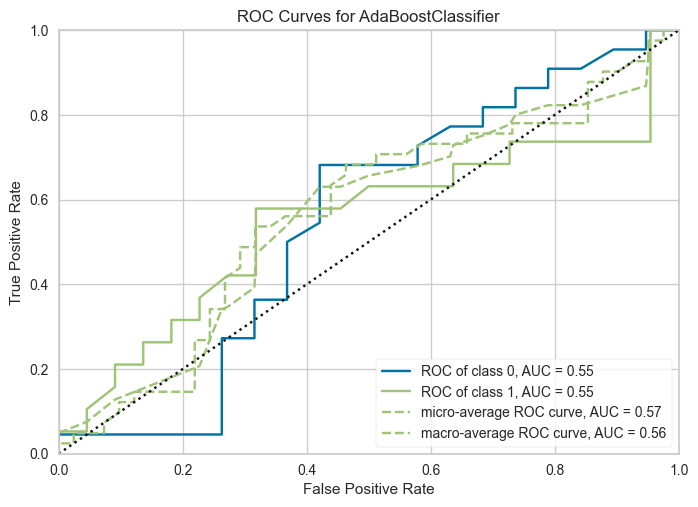

In [24]:
plot_model(model_1)

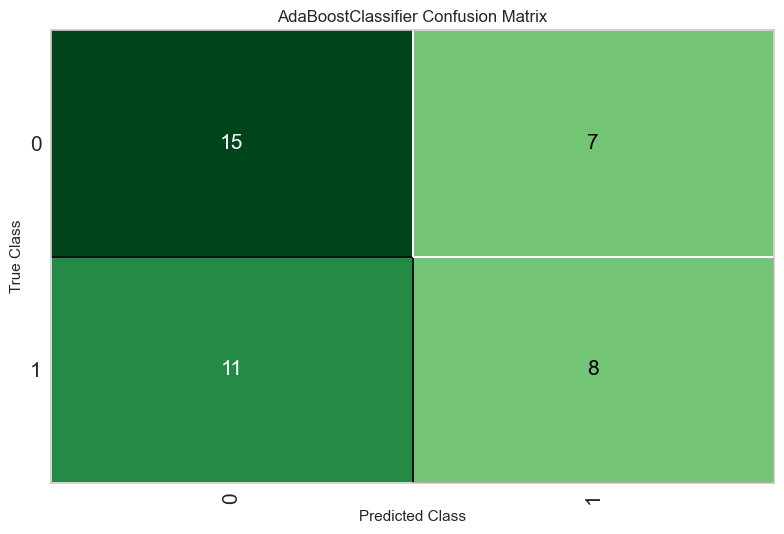

In [25]:
plot_model(model_1, 'confusion_matrix')

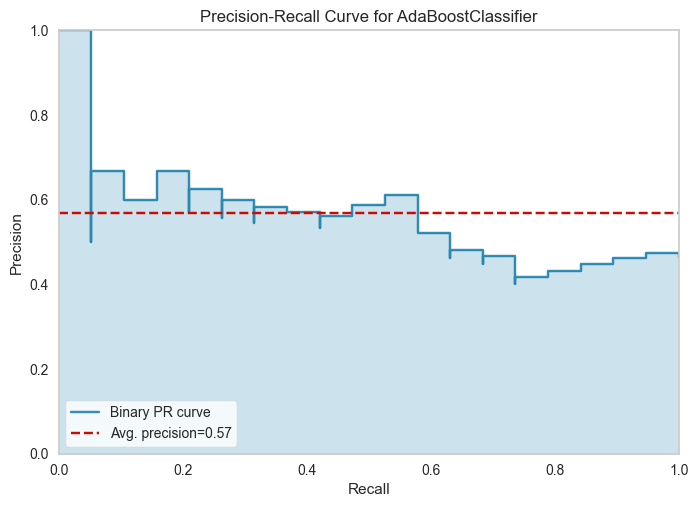

In [26]:
plot_model(model_1, 'pr')

Ajuste Model (Hyperparameters)

In [27]:
tune_model1 = tune_model(model_1)
print(tune_model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.3200,0.5000,0.2500,0.3333,0.0000,0.0000
1,0.5000,0.5000,0.5000,0.2500,0.3333,0.0000,0.0000
2,0.5000,0.2400,0.5000,0.2500,0.3333,0.0000,0.0000
3,0.6000,0.7000,0.6000,0.7778,0.5238,0.2000,0.3333
4,0.5556,0.5500,0.5556,0.5397,0.5185,0.0526,0.0598
5,0.6667,0.6250,0.6667,0.7917,0.6051,0.2703,0.3953
6,0.4444,0.3000,0.4444,0.2778,0.3419,-0.2162,-0.3162
7,0.5556,0.4250,0.5556,0.3086,0.3968,0.0000,0.0000
8,0.5556,0.4000,0.5556,0.5397,0.5185,0.0526,0.0598


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=6490)


Ajuste de 10 pliegues para cada uno de los 10 candidatos, con un total de 100 ajustes
El modelo original era mejor que el modelo ajustado, por lo que se devolverá. NOTA: Las métricas de visualización corresponden al modelo ajustado (no al original).
AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
n_estimators=50, random_state=6490)

In [28]:
# Predicción:
final_pred = predict_model(tune_model1, data=data_unseen)
final_pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.6667,0.8400,0.6667,0.7381,0.6757,0.3478,0.3780


,Age,Annual Income (k$),Spending Score (1-100),Genre,prediction_label,prediction_score
156,37,78,1,Male,Male,0.6737
90,68,59,55,Female,Male,0.5898
196,45,126,28,Female,Female,0.5155
81,38,54,55,Male,Female,0.5022
184,41,99,39,Female,Female,0.5155
77,40,54,48,Male,Male,0.5045
70,70,49,55,Male,Male,0.5898
199,30,137,83,Male,Male,0.6580
163,31,81,93,Female,Male,0.5365
94,32,60,42,Female,Female,0.5096
